### Page Rank

PageRank (developed by Larry Page and Sergey Brin) revolutionized web search by generating a ranked list of web pages based on the underlying connectivity of the web. The PageRank algorithm is based on an ideal random web surfer who, when reaching a page, goes to the next page by clicking on a link. The surfer has equal probability of clicking any link on the page and, when reaching a page with no links, has equal probability of moving to any other page by typing in its URL. In addition, the surfer may occasionally choose to type in a random URL instead of following the links on a page. The PageRank is the ranked order of the pages from the most to the least probable page the surfer will be viewing.

In [7]:
import numpy as np
import numpy.linalg as la
from readonly.PageRankFunctions import *
np.set_printoptions(suppress=True)
from matplotlib import pyplot as plt

Let's imagine a micro-internet, with just 6 websites (Avocado, Bullseye, CatBabel, Dromeda, eTings, and FaceSpace). Each website links to some of the others, and this forms a network as shown below: <br><br><br>
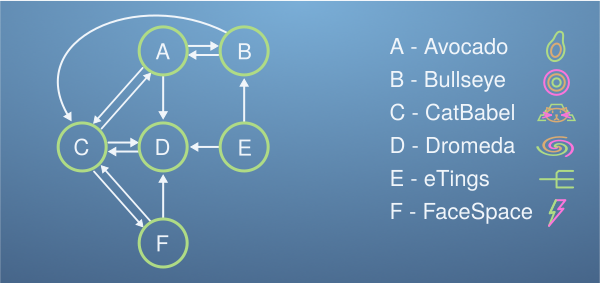

The design principle of PageRank is that important websites will be linked to by important websites. This somewhat recursive principle will form the basis of our thinking.

Imagine we have 100 surfers on our micro-internet, each viewing a single website at a time. Each minute the surfers follow a link on their website to another site on the micro-internet. After a while, the websites that are most linked to will have more surfers visiting them, and in the long run, each minute for every surfer that leaves a website, another will enter keeping the total numbers of surfers on each website constant. The PageRank is simply the ranking of websites by how many surfers they have on them at the end of this process.

We represent the number of surfers on each website with the vector: $$\mathbf{r} = \begin{bmatrix} r_A \\ r_B \\ r_C \\ r_D \\ r_E \\ r_F \end{bmatrix}$$

And say that the number of surfers on each website in minute $i+1$ is related to those at minute $i$ by the matrix transformation

$$ \mathbf{r}^{(i+1)} = L \,\mathbf{r}^{(i)}$$
with the matrix $L$ taking the form,
$$ L = \begin{bmatrix}
L_{A→A} & L_{B→A} & L_{C→A} & L_{D→A} & L_{E→A} & L_{F→A} \\
L_{A→B} & L_{B→B} & L_{C→B} & L_{D→B} & L_{E→B} & L_{F→B} \\
L_{A→C} & L_{B→C} & L_{C→C} & L_{D→C} & L_{E→C} & L_{F→C} \\
L_{A→D} & L_{B→D} & L_{C→D} & L_{D→D} & L_{E→D} & L_{F→D} \\
L_{A→E} & L_{B→E} & L_{C→E} & L_{D→E} & L_{E→E} & L_{F→E} \\
L_{A→F} & L_{B→F} & L_{C→F} & L_{D→F} & L_{E→F} & L_{F→F} \\
\end{bmatrix}
$$
where the columns represent the probability of leaving a website for any other website, and sum to one.
The rows determine how likely you are to enter a website from any other, though these need not add to one.
The long time behaviour of this system is when $ \mathbf{r}^{(i+1)} = \mathbf{r}^{(i)}$, so we'll drop the superscripts here, and that allows us to write,
$$ L \,\mathbf{r} = \mathbf{r}$$

which is an eigenvalue equation for the matrix $L$, with eigenvalue 1 (this is guaranteed by the probabalistic structure of the matrix $L$).

In [2]:
L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])

In principle, we could use a linear algebra library, as below, to calculate the eigenvalues and vectors. And this would work for a small system. But this gets unmanagable for large systems. And since we only care about the principal eigenvector (the one with the largest eigenvalue, which will be 1 in this case), we can use the power iteration method which will scale better, and is faster for large systems.

In [3]:
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # Sets r to be the principal eigenvector
100 * np.real(r / np.sum(r))

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

Let's now try to get the same result using the Power-Iteration method

In [4]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

18 iterations to convergence.


array([16.00149917,  5.33252025, 39.99916911, 25.3324738 ,  0.        ,
       13.33433767])

Now we will produce a function that can calculate the PageRank for an arbitrarily large probability matrix.

In [5]:
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    # ModifiedMatrix is the modified link matrix that incorporates the damping factor d
    ModifiedMatrix = d * linkMatrix + (1-d)/n * np.ones([n, n])
    r = 100 * np.ones(n) / n
    lastR = r
    r = ModifiedMatrix @ r
    i = 0
    while la.norm(lastR - r) > 0.01 :
        lastR = r
        r = ModifiedMatrix @ r
        i += 1
    return r

### Testing the code

In [9]:
# Use the following function to generate internets of different sizes.
L = generate_internet(10)
pageRank(L, 1)

array([ 0.00103681,  0.00103681,  0.00183498,  0.00103681, 59.98871098,
       39.99166893,  0.00448882,  0.00448882,  0.00466025,  0.00103681])